In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
path_to_data = "/home/fabg/gdrive_columbia/classes/COMSW4995/DOHMH_New_York_City_Restaurant_Inspection_Results_20260210.csv"

In [4]:
# read the data
data = pd.read_csv(path_to_data)

In [9]:
# print the column names
print(data.columns)

# print unique BORO values
print(data["BORO"].unique())

Index(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE', 'Latitude', 'Longitude',
       'Community Board', 'Council District', 'Census Tract', 'BIN', 'BBL',
       'NTA', 'Location'],
      dtype='object')
['Manhattan' 'Queens' 'Staten Island' 'Brooklyn' '0' 'Bronx']


In [6]:
# print common violation codes
print(data["VIOLATION CODE"].value_counts().head(10))

# and corresponding VIOLATION DESCRIPTION
print(data["VIOLATION DESCRIPTION"].value_counts().head(10))

VIOLATION CODE
10F    41113
08A    27240
06D    18809
10B    18440
02G    18279
06C    18079
04L    15671
02B    15591
04N    11930
04A     8141
Name: count, dtype: int64
VIOLATION DESCRIPTION
Non-food contact surface or equipment made of unacceptable material, not kept clean, or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.                                                                38590
Establishment is not free of harborage or conditions conducive to rodents, insects or other pests.                                                                                                                                                                                     25306
Food contact surface not properly washed, rinsed and sanitized after each use and following any activity when contamination may have occurred.                                                                                               

In [7]:
# filter all entries to only those with a valid CUISINE DESCRIPTION
data_with_cuise = data[data["CUISINE DESCRIPTION"].notna()]
# compare the number of entries with and without CUISINE DESCRIPTION
print("Number of entries with CUISINE DESCRIPTION:", len(data_with_cuise))
print(
    "Number of entries without CUISINE DESCRIPTION:", len(data) - len(data_with_cuise)
)

Number of entries with CUISINE DESCRIPTION: 293060
Number of entries without CUISINE DESCRIPTION: 3210


In [17]:
# 5 bar charts for the top 10 most common cuisines in each borough

top_10_cuisine_Manhattan = (
    data_with_cuise[data_with_cuise["BORO"] == "Manhattan"]["CUISINE DESCRIPTION"]
    .value_counts()
    .head(10)
)
top_10_cuisine_Bronx = (
    data_with_cuise[data_with_cuise["BORO"] == "Bronx"]["CUISINE DESCRIPTION"]
    .value_counts()
    .head(10)
)
top_10_cuisine_Brooklyn = (
    data_with_cuise[data_with_cuise["BORO"] == "Brooklyn"]["CUISINE DESCRIPTION"]
    .value_counts()
    .head(10)
)
top_10_cuisine_Queens = (
    data_with_cuise[data_with_cuise["BORO"] == "Queens"]["CUISINE DESCRIPTION"]
    .value_counts()
    .head(10)
)
top_10_cuisine_Staten_Island = (
    data_with_cuise[data_with_cuise["BORO"] == "Staten Island"]["CUISINE DESCRIPTION"]
    .value_counts()
    .head(10)
)

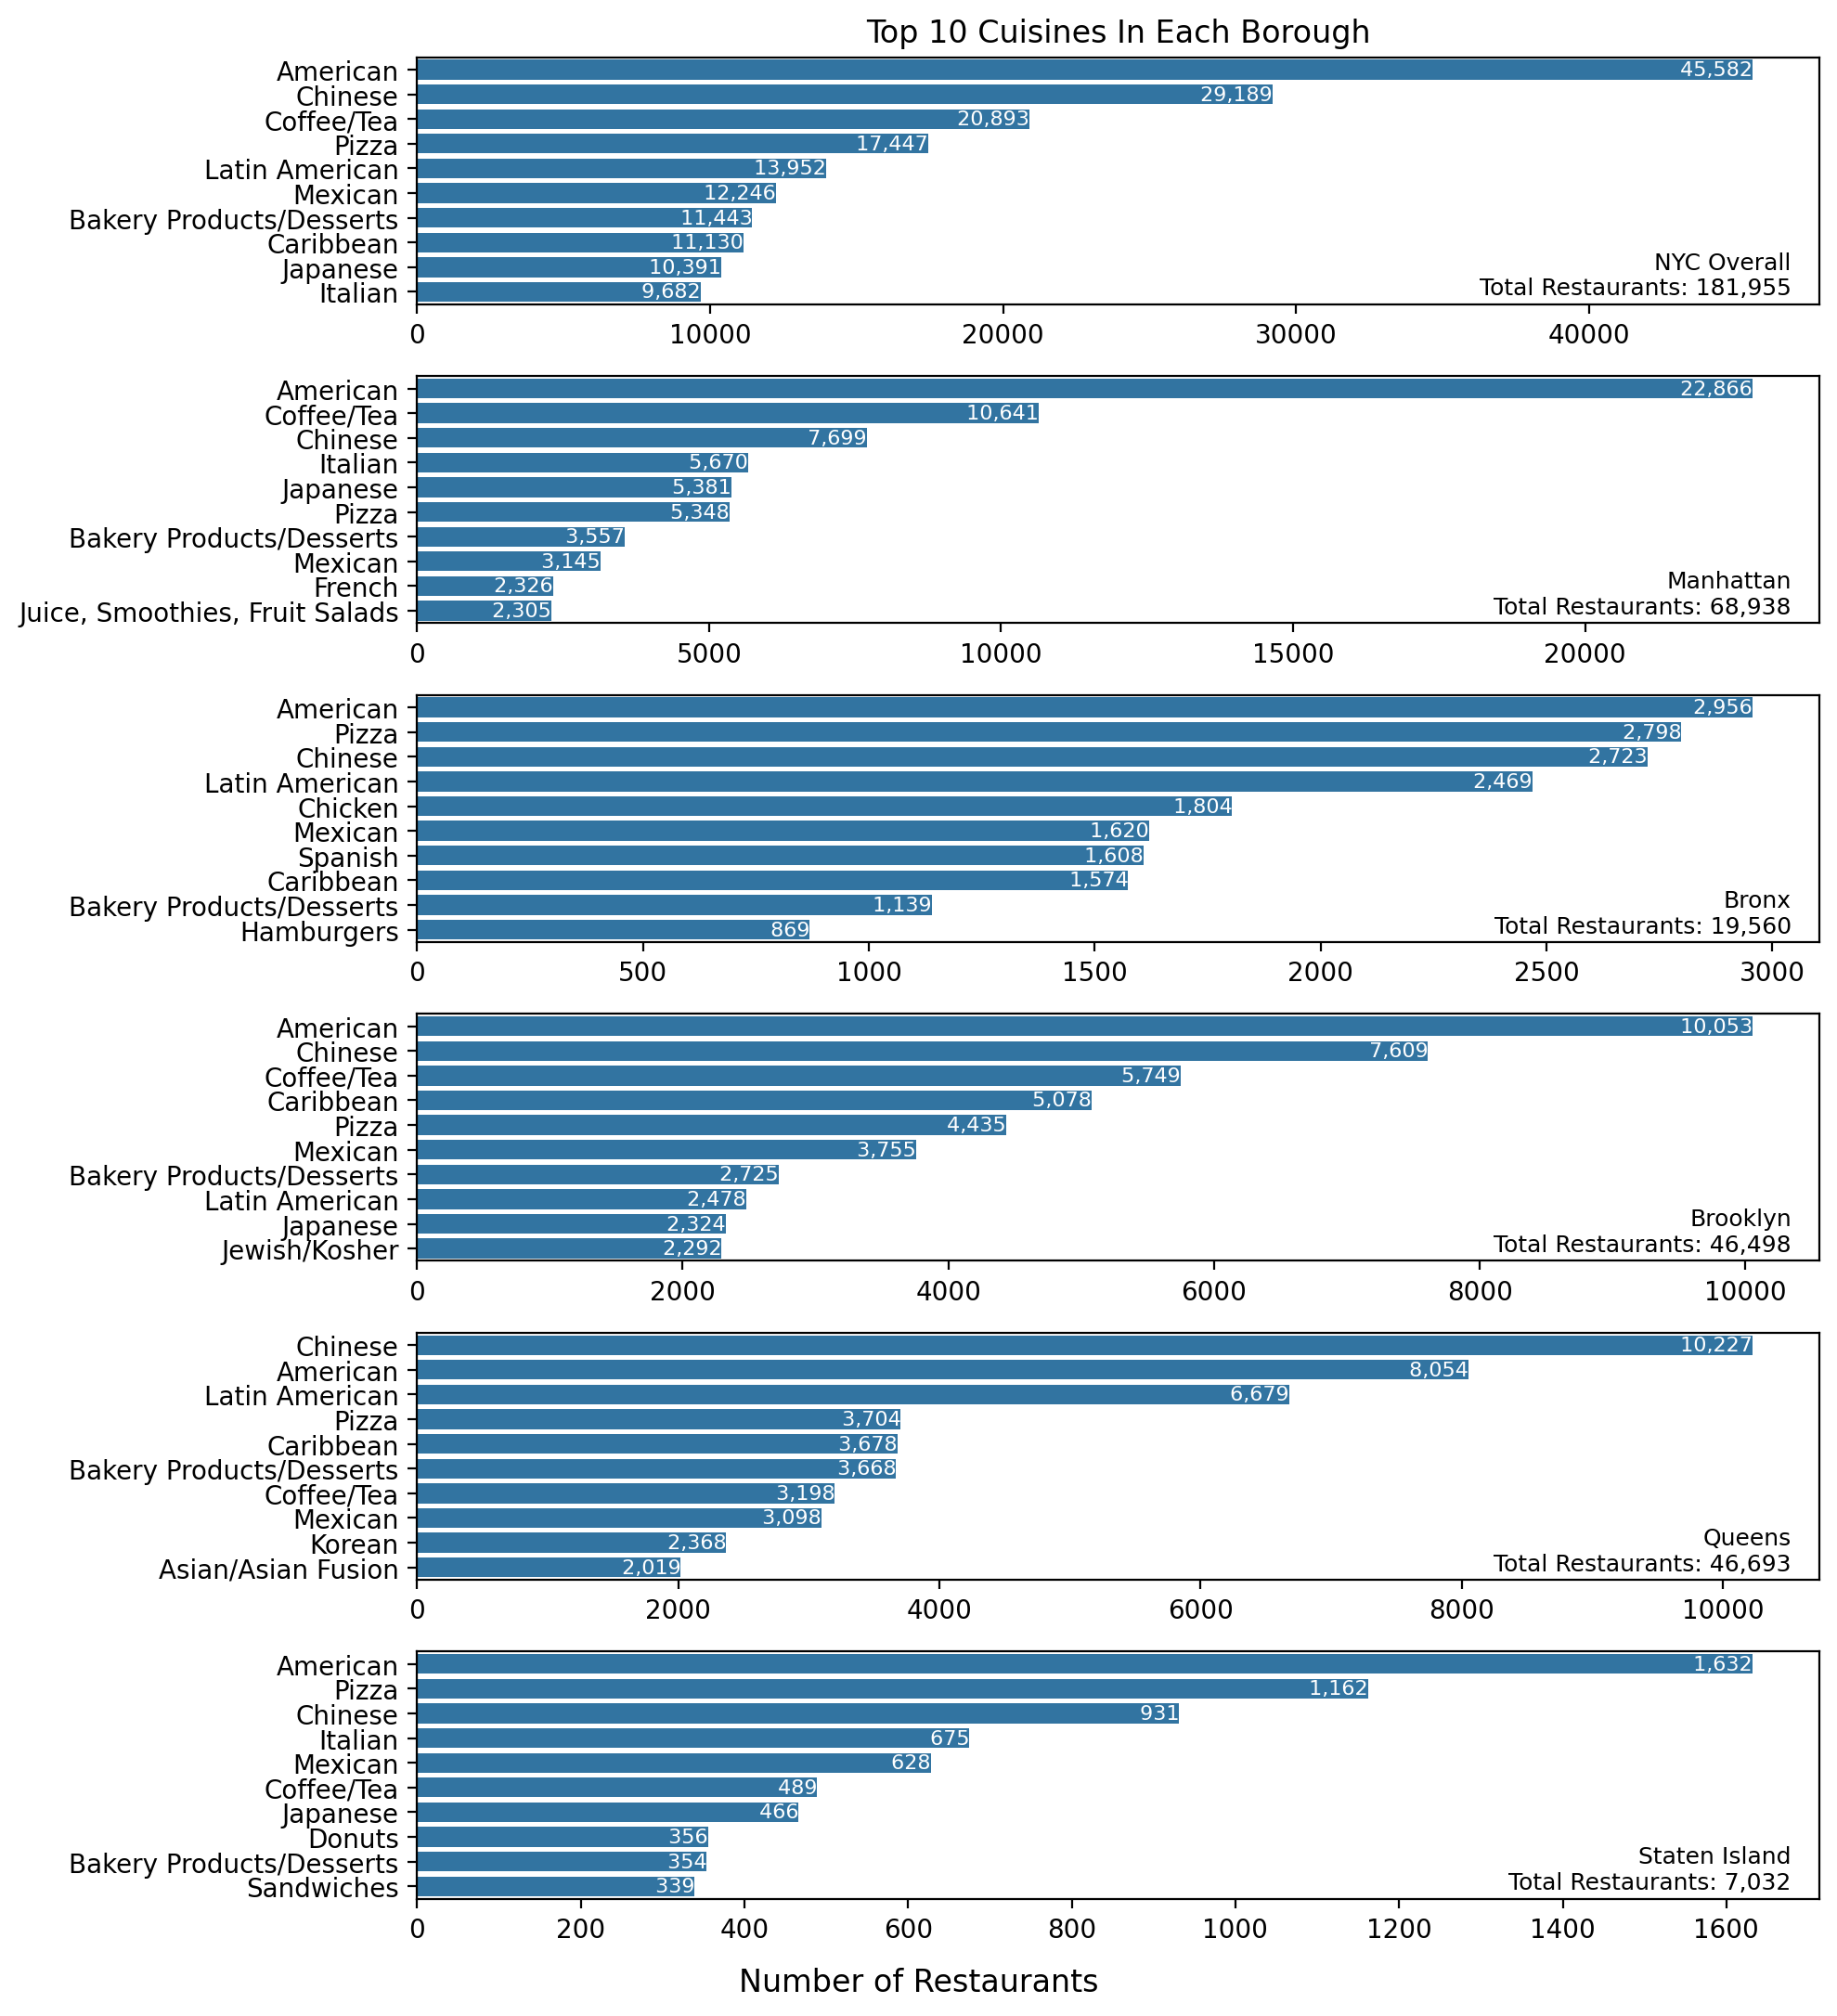

In [68]:
top_10_cuisine_city = data_with_cuise["CUISINE DESCRIPTION"].value_counts().head(10)

fig, ax = plt.subplots(6, 1, figsize=(10, 11), dpi=200)
sns.barplot(
    x=top_10_cuisine_city.values,
    y=top_10_cuisine_city.index,
    ax=ax[0],
    orient="h",
)
ax[0].set_title("Top 10 Cuisines In Each Borough")
ax[0].set_xlabel("")
ax[0].set_ylabel("")
for i, v in enumerate(top_10_cuisine_city.values):
    ax[0].text(v, i, f" {v:,}", ha="right", va="center", color="white", fontsize=8)
ax[0].text(
    0.98,
    0.02,
    f"NYC Overall\nTotal Restaurants: {top_10_cuisine_city.sum():,}",
    transform=ax[0].transAxes,
    ha="right",
    va="bottom",
    fontsize=9,
)

sns.barplot(
    x=top_10_cuisine_Manhattan.values,
    y=top_10_cuisine_Manhattan.index,
    ax=ax[1],
    orient="h",
)
ax[1].set_title("")
ax[1].set_xlabel("")
ax[1].set_ylabel("")
for i, v in enumerate(top_10_cuisine_Manhattan.values):
    ax[1].text(v, i, f" {v:,}", ha="right", va="center", color="white", fontsize=8)
ax[1].text(
    0.98,
    0.02,
    f"Manhattan\nTotal Restaurants: {top_10_cuisine_Manhattan.sum():,}",
    transform=ax[1].transAxes,
    ha="right",
    va="bottom",
    fontsize=9,
)

sns.barplot(
    x=top_10_cuisine_Bronx.values, y=top_10_cuisine_Bronx.index, ax=ax[2], orient="h"
)
ax[2].set_title("")
ax[2].set_xlabel("")
ax[2].set_ylabel("")
for i, v in enumerate(top_10_cuisine_Bronx.values):
    ax[2].text(v, i, f" {v:,}", ha="right", va="center", color="white", fontsize=8)
ax[2].text(
    0.98,
    0.02,
    f"Bronx\nTotal Restaurants: {top_10_cuisine_Bronx.sum():,}",
    transform=ax[2].transAxes,
    ha="right",
    va="bottom",
    fontsize=9,
)

sns.barplot(
    x=top_10_cuisine_Brooklyn.values,
    y=top_10_cuisine_Brooklyn.index,
    ax=ax[3],
    orient="h",
)
ax[3].set_title("")
ax[3].set_xlabel("")
ax[3].set_ylabel("")
for i, v in enumerate(top_10_cuisine_Brooklyn.values):
    ax[3].text(v, i, f" {v:,}", ha="right", va="center", color="white", fontsize=8)
ax[3].text(
    0.98,
    0.02,
    f"Brooklyn\nTotal Restaurants: {top_10_cuisine_Brooklyn.sum():,}",
    transform=ax[3].transAxes,
    ha="right",
    va="bottom",
    fontsize=9,
)

sns.barplot(
    x=top_10_cuisine_Queens.values, y=top_10_cuisine_Queens.index, ax=ax[4], orient="h"
)
ax[4].set_title("")
ax[4].set_xlabel("")
ax[4].set_ylabel("")
for i, v in enumerate(top_10_cuisine_Queens.values):
    ax[4].text(v, i, f" {v:,}", ha="right", va="center", color="white", fontsize=8)
ax[4].text(
    0.98,
    0.02,
    f"Queens\nTotal Restaurants: {top_10_cuisine_Queens.sum():,}",
    transform=ax[4].transAxes,
    ha="right",
    va="bottom",
    fontsize=9,
)

sns.barplot(
    x=top_10_cuisine_Staten_Island.values,
    y=top_10_cuisine_Staten_Island.index,
    ax=ax[5],
    orient="h",
)
ax[5].set_title("")
ax[5].set_xlabel("")
ax[5].set_ylabel("")
for i, v in enumerate(top_10_cuisine_Staten_Island.values):
    ax[5].text(v, i, f" {v:,}", ha="right", va="center", color="white", fontsize=8)
ax[5].text(
    0.98,
    0.02,
    f"Staten Island\nTotal Restaurants: {top_10_cuisine_Staten_Island.sum():,}",
    transform=ax[5].transAxes,
    ha="right",
    va="bottom",
    fontsize=9,
)

fig.text(0.5, 0.02, "Number of Restaurants", ha="center", fontsize=12)
plt.tight_layout(rect=[0, 0.03, 1, 1])
plt.show()

In [58]:
# most common violations for each cuisine type in the top 5 most common cuisines in the entire city
top_5_cuisines = data_with_cuise['CUISINE DESCRIPTION'].value_counts().head(5)
for cuisine in top_5_cuisines.index:
    print(f"\nMost common violations for {cuisine}:")
    violations = data_with_cuise[data_with_cuise['CUISINE DESCRIPTION'] == cuisine]['VIOLATION CODE'].value_counts().head(3)
    for violation, count in violations.items():
        print(f"  {violation}: {count}")
     


Most common violations for American:
  10F: 6798
  08A: 4196
  06D: 4011

Most common violations for Chinese:
  10F: 3664
  08A: 2881
  02G: 2462

Most common violations for Coffee/Tea:
  10F: 3315
  06D: 2010
  08A: 1527

Most common violations for Pizza:
  10F: 2542
  08A: 1744
  02B: 1649

Most common violations for Latin American:
  10F: 1740
  08A: 1243
  02B: 997


In [59]:
# get corresponding violation descriptions for the most common violations of each cuisine type
for cuisine in top_5_cuisines.index:
    print(f"\nMost common violations for {cuisine}:")
    violations = data_with_cuise[data_with_cuise['CUISINE DESCRIPTION'] == cuisine]['VIOLATION CODE'].value_counts().head(3)
    for violation, count in violations.items():
        description = data_with_cuise[data_with_cuise['VIOLATION CODE'] == violation]['VIOLATION DESCRIPTION'].iloc[0]
        print(f"  {violation} ({description}): {count}")


Most common violations for American:
  10F (Non-food contact surface or equipment made of unacceptable material, not kept clean, or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.): 6798
  08A (Establishment is not free of harborage or conditions conducive to rodents, insects or other pests.): 4196
  06D (Food contact surface not properly washed, rinsed and sanitized after each use and following any activity when contamination may have occurred.): 4011

Most common violations for Chinese:
  10F (Non-food contact surface or equipment made of unacceptable material, not kept clean, or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.): 3664
  08A (Establishment is not free of harborage or conditions conducive to rodents, insects or other pests.): 2881
  02G (Cold TCS food item held above 41 °F; smoked or processed fish held above 38

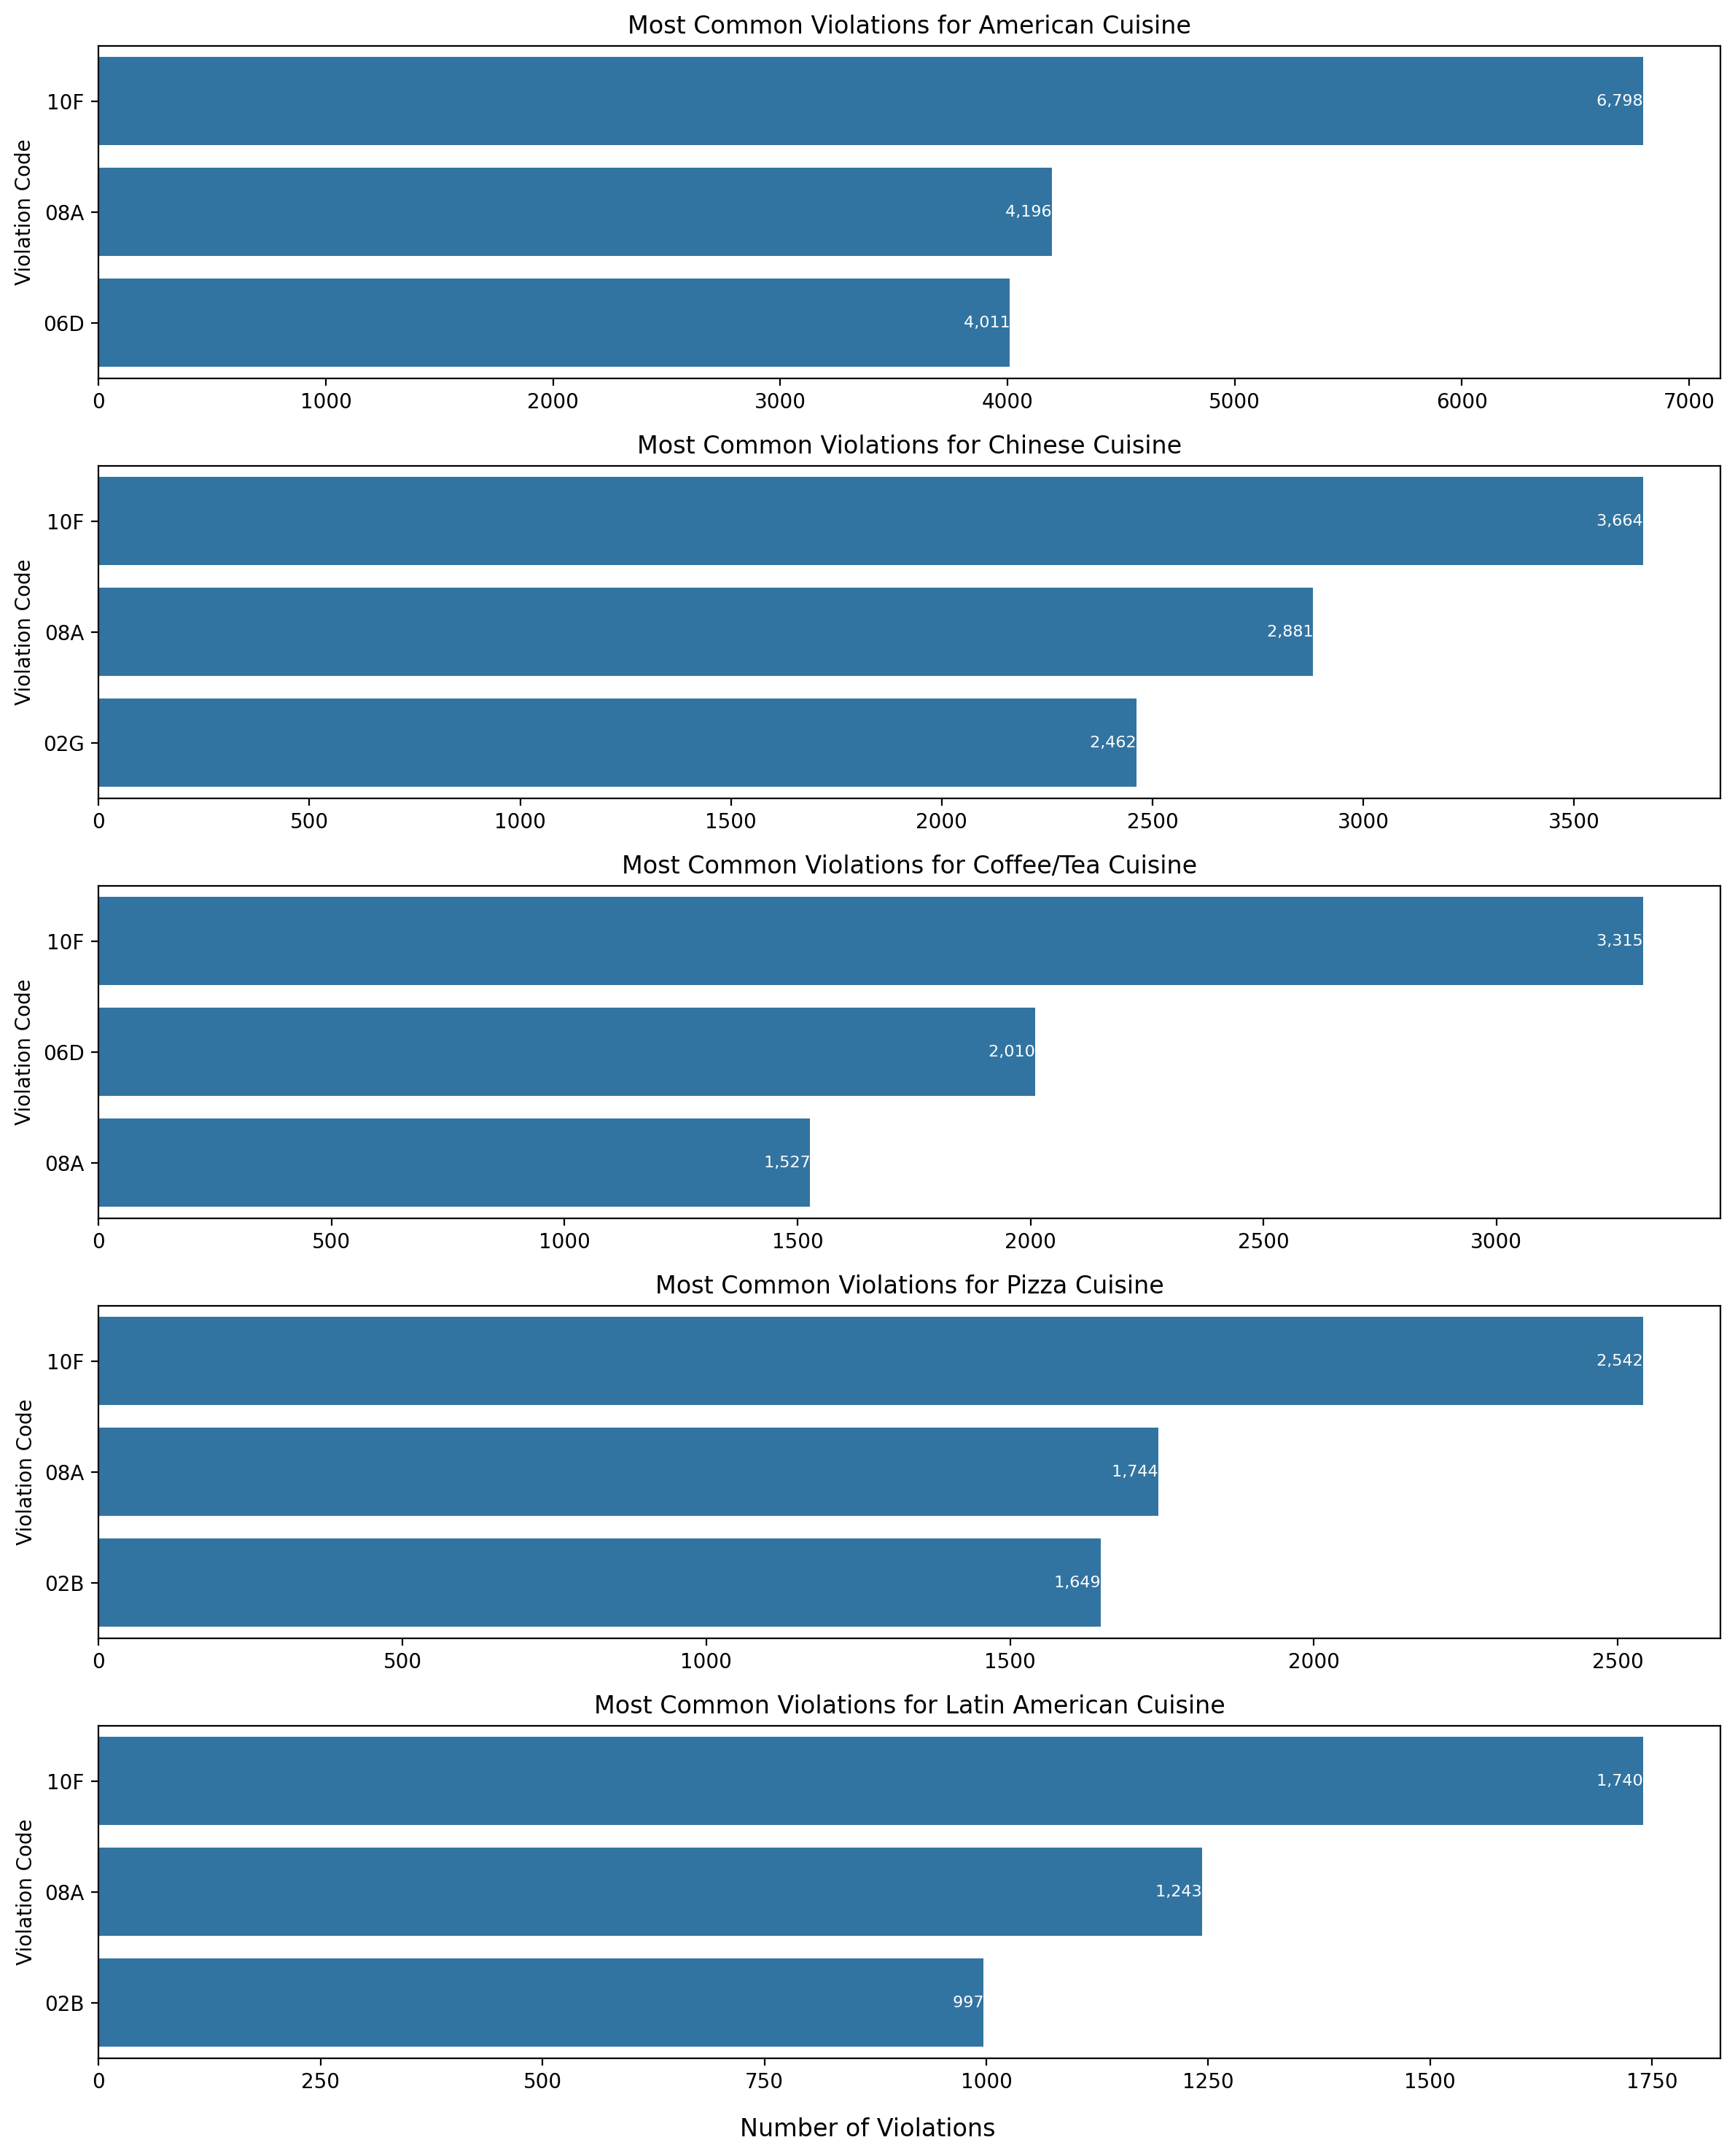

In [61]:
# now do the distribution of most common violations for each cuisine type in the top 5 most common cuisines in the entire city
fig, axes = plt.subplots(5, 1, figsize=(12, 15), dpi=200)

for idx, cuisine in enumerate(top_5_cuisines.index):
    violations = data_with_cuise[data_with_cuise['CUISINE DESCRIPTION'] == cuisine]['VIOLATION CODE'].value_counts().head(3)
    sns.barplot(x=violations.values, y=violations.index, ax=axes[idx], orient='h')
    axes[idx].set_title(f"Most Common Violations for {cuisine} Cuisine")
    axes[idx].set_xlabel("")
    axes[idx].set_ylabel("Violation Code")
    for i, v in enumerate(violations.values):
        axes[idx].text(v, i, f" {v:,}", ha="right", va="center", color="white", fontsize=8)

fig.text(0.5, 0.02, "Number of Violations", ha="center", fontsize=12)
plt.tight_layout(rect=[0, 0.03, 1, 1])
plt.show()


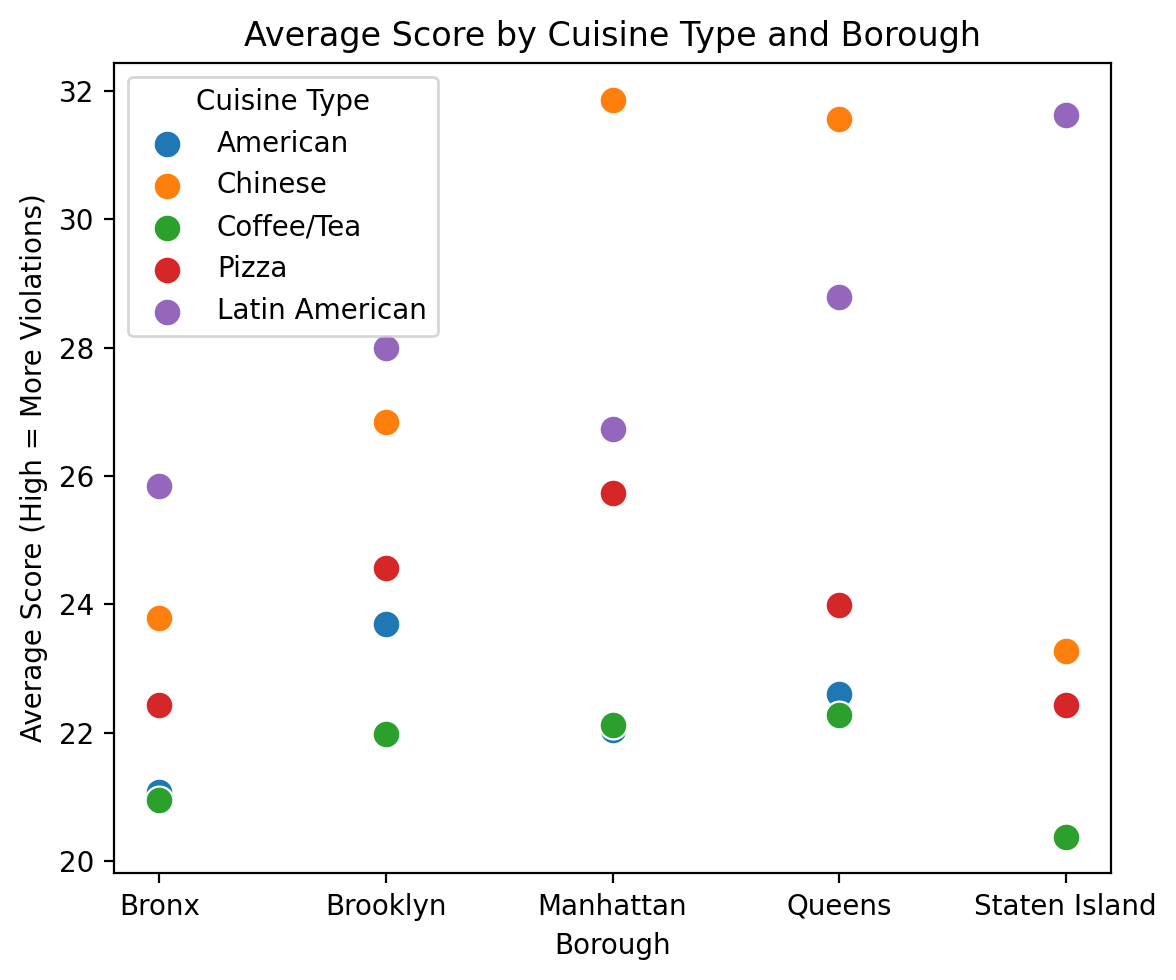

In [71]:
# scatter of average score (high score means bad/ more violations) in the y axis  
# vs cuisine type x  for the five boroughs (one panel) for the top 5 most common cuisines in the entire city
# Filter out borough "0" and create the scatter plot
fig, ax = plt.subplots(figsize=(6, 5), dpi=200)

for cuisine in top_5_cuisines.index:
    # Filter data for this cuisine and exclude borough "0"
    cuisine_data = data_with_cuise[
        (data_with_cuise['CUISINE DESCRIPTION'] == cuisine) & 
        (data_with_cuise['BORO'] != "0")
    ]
    avg_scores = cuisine_data.groupby('BORO')['SCORE'].mean()
    sns.scatterplot(x=avg_scores.index, y=avg_scores.values, ax=ax, label=cuisine, s=100)

ax.set_title("Average Score by Cuisine Type and Borough")
ax.set_xlabel("Borough")
ax.set_ylabel("Average Score (High = More Violations)")
ax.legend(title="Cuisine Type")
plt.tight_layout()
plt.show()

Cuisine with the highest average score: Bangladeshi


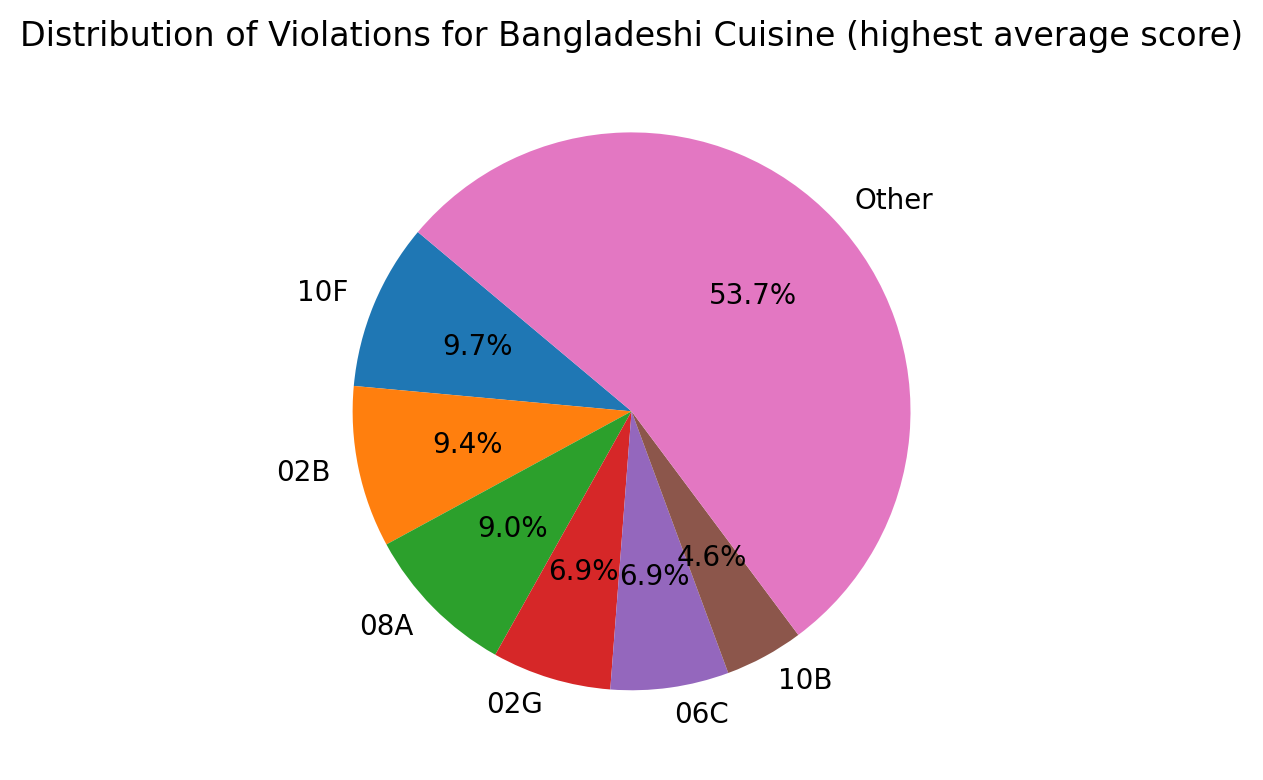

In [97]:
# for the cuisine with the highest average score, what are the leading violations contributing to the higher average score?

# calculate the average score for each cuisine type (only cuisines with at least 10 restaurants)
cuisine_counts = data_with_cuise["CUISINE DESCRIPTION"].value_counts()
eligible_cuisines = cuisine_counts[cuisine_counts >= 10].index
avg_scores_by_cuisine = data_with_cuise[
    data_with_cuise["CUISINE DESCRIPTION"].isin(eligible_cuisines)
].groupby("CUISINE DESCRIPTION")["SCORE"].mean()

# find the cuisine with the highest average score
cuisine_with_highest_avg_score = avg_scores_by_cuisine.idxmax()
print(f"Cuisine with the highest average score: {cuisine_with_highest_avg_score}")

# filter the data for this cuisine
cuisine_data = data_with_cuise[
    data_with_cuise["CUISINE DESCRIPTION"] == cuisine_with_highest_avg_score
]

# get the most common violations for this cuisine
common_violations = cuisine_data["VIOLATION CODE"].value_counts().head(N)

# make a pie chart of N most common violations for this cuisine, and label the rest with "Other"
labels = common_violations.index.tolist() + ["Other"]
sizes = common_violations.values.tolist() + [
    cuisine_data["VIOLATION CODE"].value_counts().sum() - common_violations.values.sum()
]
fig, ax = plt.subplots(figsize=(4, 4), dpi=200)
ax.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=140)
ax.set_title(
    f"Distribution of Violations for {cuisine_with_highest_avg_score} Cuisine (highest average score)"
)
plt.tight_layout()
plt.show()


In [96]:
# print raw counts of the most common violations for this cuisine
print(f"Most common violations for {cuisine_with_highest_avg_score} cuisine:")
common_violations = cuisine_data["VIOLATION CODE"].value_counts().head(100)
for violation, count in common_violations.items():
    description = (
        cuisine_data[cuisine_data["VIOLATION CODE"] == violation][
            "VIOLATION DESCRIPTION"
        ]
        .dropna()
        .iloc[0]
    )
    print(f"  {violation} ({description}): {count}")

Most common violations for Bangladeshi cuisine:
  10F (Non-food contact surface or equipment made of unacceptable material, not kept clean, or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.): 165
  02B (Hot TCS food item not held at or above 140 °F.): 160
  08A (Establishment is not free of harborage or conditions conducive to rodents, insects or other pests.): 153
  02G (Cold TCS food item held above 41 °F; smoked or processed fish held above 38 °F; intact raw eggs held above 45 °F; or reduced oxygen packaged (ROP) TCS foods held above required temperatures except during active necessary preparation.): 118
  06C (Food, supplies, or equipment not protected from potential source of contamination during storage, preparation, transportation, display, service or from customer’s refillable, reusable container. Condiments not in single-service containers or dispensed directly by the vendor.): 117
  10B (Anti-sip

In [86]:
# verify the percentage of the most common violation for this cuisine is consistent with the percentage shown in the pie chart
most_common_violation = common_violations.index[0]
most_common_violation_count = common_violations.values[0]
total_violations = cuisine_data['VIOLATION CODE'].value_counts().sum()
calculated_percentage = (most_common_violation_count / total_violations) * 100      

In [87]:
print(calculated_percentage)

9.660421545667447
